https://www.kaggle.com/mlg-ulb/creditcardfraud

https://pandas-ml.readthedocs.io/en/latest/modelframe.html

https://pandas-ml.readthedocs.io/en/latest/imbalance.html

In [17]:
!pip install -U imbalanced-learn

     |████████████████████████████████| 174kB 895kB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [18]:
!pip install -U pandas_ml

Requirement already up-to-date: pandas_ml in /anaconda3/lib/python3.6/site-packages (0.6.1)
You should consider upgrading via the 'pip install --upgrade pip' command.


## Introduction to pandas_ml by handling data

#### `ModelFrame` can call other statistics/ML functions in more simple way
  * Creation `ModelFram` is similar to `Pandas Dataframe`

In [19]:
import pandas as pd
import numpy as np

import pandas_ml as pdml

## Handling `Imbalance` Dataset
#### Creating a modelframe where the `target` values are `0 `, `1` and the propotion of the values is `80%` and `20%` respectively

In [20]:
mf = pdml.ModelFrame(np.random.randn(100, 5),
                     target = np.array([0, 1]).repeat([80, 20]),
                     columns = list('ABCDE'))

In [21]:
mf.head()

,.target,A,B,C,D,E
0,0,0.110225,1.841503,-0.019234,1.351317,0.505961
1,0,-0.540562,-0.367921,1.762666,0.034601,1.591332
2,0,-0.858470,0.297982,0.084310,-0.980489,0.923869
3,0,-0.275151,0.761847,1.342142,-0.406492,0.400381
4,0,-0.065462,0.961480,1.072228,1.699816,-1.319097


In [22]:
type(mf)

pandas_ml.core.frame.ModelFrame

In [23]:
mf.target.value_counts()

0    80
1    20
Name: .target, dtype: int64


## Performing Under Sampling
* Under Sampling is a method to reduce the datapoints of the majority class equal to the data points of minority class, this practice results in a loss of information in the newly undersampled dataset

https://pandas-ml.readthedocs.io/en/latest/imbalance.html

In [24]:
sampler = mf.imbalance.under_sampling.ClusterCentroids()

In [25]:
sampler

ClusterCentroids(estimator=None, n_jobs=1, random_state=None, ratio=None,
         sampling_strategy='auto', voting='auto')

In [26]:
sampled = mf.fit_sample(sampler)

In [27]:
sampled.head()

,.target,A,B,C,D,E
0,0,0.973738,-0.268020,0.466730,1.181708,-0.590465
1,0,-1.421430,-0.561208,0.612815,-0.835204,-0.067300
2,0,-0.967507,-1.037346,-0.338297,1.231185,-0.655855
3,0,-0.083353,-1.332814,0.985812,-0.567888,0.613643
4,0,0.273630,1.744314,0.250174,0.825882,0.178074


In [28]:
sampled.target.value_counts()

1    20
0    20
Name: .target, dtype: int64

## Performing oversampling

### Oversampling using SMOTE
* Oversampling is the process of creating data points of the minority class that it'll be equal to the data points of the majority class, the creation of new datapoints mainly done by copying which may lead to overfitting. `SMOTE` is a method that creates synthetic points for minority class in a more acceptable way, it evaluates the linear distance between the neighbouring feature vector of minority class points and multiply the value randomly with any point from 0 to 10.

In [29]:
sampler = mf.imbalance.over_sampling.SMOTE()
sampler

SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
   out_step='deprecated', random_state=None, ratio=None,
   sampling_strategy='auto', svm_estimator='deprecated')

In [30]:
sampled = mf.fit_sample(sampler)
sampled.head()

,.target,A,B,C,D,E
0,0,0.110225,1.841503,-0.019234,1.351317,0.505961
1,0,-0.540562,-0.367921,1.762666,0.034601,1.591332
2,0,-0.858470,0.297982,0.084310,-0.980489,0.923869
3,0,-0.275151,0.761847,1.342142,-0.406492,0.400381
4,0,-0.065462,0.961480,1.072228,1.699816,-1.319097


In [31]:
sampled.target.value_counts()

1    80
0    80
Name: .target, dtype: int64

## Balancing data using `Sklear.utils.resample`
https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.under_sampling.RandomUnderSampler.html#imblearn.under_sampling.RandomUnderSampler

In [18]:
X = pd.concat([X_train, y_train], axis=1)

In [19]:
X = X.reset_index(drop=True)

#### Separate minority and majority classes

In [20]:
non_diabetic = diabetes_data[diabetes_data.diagnosis==0]

diabetic = diabetes_data[diabetes_data.diagnosis==1]

## Oversampling
* Oversampling the minority class

In [36]:
from sklearn.utils import resample 

* replace: sample with replacement
* n_samples: number of samples to match
* random_state: For reproducible results

In [23]:
over_sampled = resample(diabetic,
                        replace = True, 
                        n_samples = len(non_diabetic), 
                        random_state = 27) 

#### Combine majority and upsampled minority

In [24]:
over_sampled = pd.concat([non_diabetic, over_sampled])

over_sampled = over_sampled.reset_index(drop=True)

In [25]:
over_sampled.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,diagnosis
855,10,115,0,0,0,0.0,0.261,30,1
157,2,128,64,42,0,40.0,1.101,24,0
814,4,171,72,0,0,43.6,0.479,26,1
375,6,123,72,45,230,33.6,0.733,34,0
231,1,100,66,29,196,32.0,0.444,42,0


#### New class counts

In [26]:
diagnosis_count = over_sampled.diagnosis.value_counts()

Class 0: 487
Class 1: 487
Proportion: 1.0 : 1


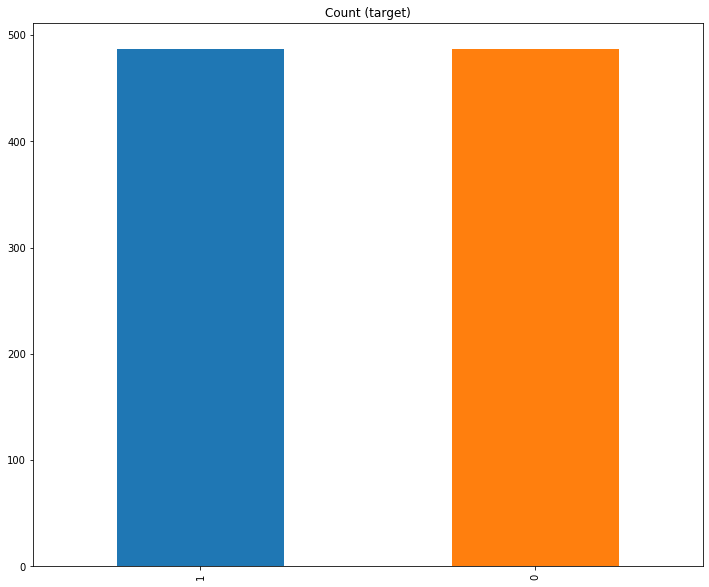

In [27]:
print('Class 0:', diagnosis_count[0])
print('Class 1:', diagnosis_count[1])
print('Proportion:', round(diagnosis_count[0] / diagnosis_count[1], 2), ': 1')

diagnosis_count.plot(kind='bar', title='Count (target)', figsize = (12, 10));

In [28]:
y_train = over_sampled.diagnosis

X_train = over_sampled.drop('diagnosis', axis=1)

In [29]:
logistic_model = LogisticRegression(solver='liblinear')

In [30]:
logistic_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

### Checking accuracy

In [31]:
y_pred = logistic_model.predict(X_test)

In [32]:
pd.crosstab (y_pred, y_test)

diagnosis,0,1
row_0,,
0,101,1
1,23,9


In [33]:
metrics.accuracy_score(y_test, y_pred)

0.8208955223880597

In [34]:
metrics.precision_score(y_test, y_pred)

0.28125

In [35]:
metrics.recall_score(y_test, y_pred)

0.9

## Undersampling
* Unsampling the majority class

In [50]:
under_sampled = resample(non_diabetic,
                         replace=True, 
                         n_samples=len(diabetic), 
                         random_state=27) # reproducible results

In [51]:
under_sampled = pd.concat([diabetic, under_sampled])
under_sampled = under_sampled.reset_index(drop=True)

Class 0: 487
Class 1: 487
Proportion: 1.0 : 1


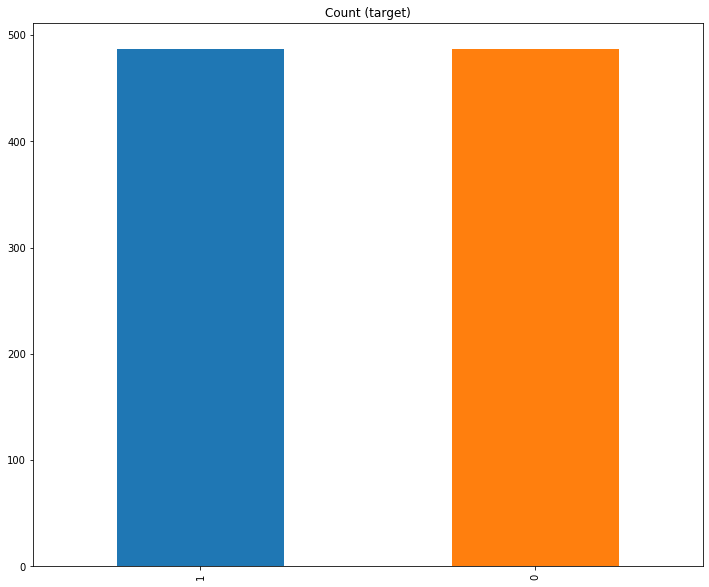

In [52]:
print('Class 0:', diagnosis_count[0])
print('Class 1:', diagnosis_count[1])
print('Proportion:', round(diagnosis_count[0] / diagnosis_count[1], 2), ': 1')

diagnosis_count.plot(kind='bar', title='Count (target)', figsize= (12, 10));

In [42]:
y_train = under_sampled.diagnosis

X_train = under_sampled.drop('diagnosis', axis=1)

In [43]:
logistic_model = LogisticRegression(solver='liblinear')

In [44]:
logistic_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

### Checking accuracy

In [45]:
y_pred = logistic_model.predict(X_test)

In [46]:
pd.crosstab (y_pred, y_test)

diagnosis,0,1
row_0,,
0,93,2
1,31,8


In [47]:
metrics.accuracy_score(y_test, y_pred)

0.753731343283582

In [48]:
metrics.precision_score(y_test, y_pred)

0.20512820512820512

In [49]:
metrics.recall_score(y_test, y_pred)

0.8